# **Import All File**

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Import Dataset**

In [2]:
df=pd.read_excel('Covid_19_dataset_with_preprocessing_3700_data_2.xlsx')
df.head()

,opinion,Category
0,টিকায় সুরক্ষ দরক নাই বেক্সিমকোর জয়েন্ট ভেঞ্চ...,2
1,মত মৃত্যুর ভয়ে ঘরে বসে থাকা সামর্থ্য সব নেই,1
2,সৈকত বন্ধ দেয়া সরকার,0
3,বর্তমানে করোনা মহামারি প্রকৃতির পক্ষথে গজব তার...,0
4,এরপর একটু সচেতনতা বৃদ্ধি হয় তাইলে কুকুর কামড়...,2


#**Define Dataset length**

In [3]:
len(df)

3700

# **Check If there any null Value**

In [4]:
df.isnull().sum()

opinion     1
Category    0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.Label = df.Category.astype(int)

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [7]:
df.isnull().sum()

opinion     0
Category    0
dtype: int64

# **Totall Data in every group**

In [8]:
df.groupby('Category').size().reset_index(name='counts')

,Category,counts
0,0,1547
1,1,971
2,2,1181


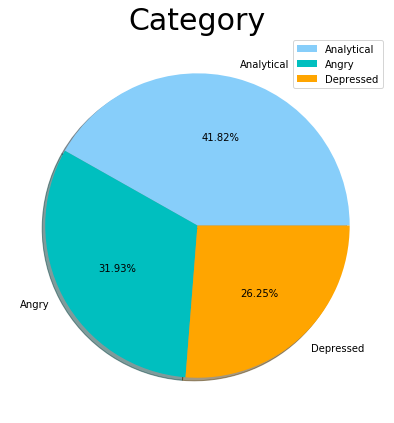

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 7)
visitor = df
size = visitor['Category'].value_counts()
colors = ['lightskyblue', 'c', 'orange']
labels =  "Analytical", "Angry", "Depressed"
explode = [0.0, 0.0, 0.0]
plt.subplot(1, 1, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Category', fontsize = 30)
plt.axis('off')
plt.legend()
plt.savefig('Category_with_imbalanced_dataset.png')

#**Balancing Dataset:**

**Resample:**

In [11]:
from sklearn.utils import resample

In [12]:
# Separate majority and minority classes
df_majority = df[df.Label==0]
df_majority1 = df[df.Label==1]
#df_minority = df[df.Label==0]
df_minority2 = df[df.Label==2]
#df_minority2 = df[df.Label==4]

In [13]:
# Separate majority and minority classes
#df_majority = df[df.Label==1]
#df_majority1 = df[df.Label==2]
#df_minority = df[df.Label==0]
#df_minority2 = df[df.Label==3]
#df_minority2 = df[df.Label==4]

In [14]:
# Upsample minority class
#df_minority_upsampled = resample(df_minority2, 
                                 #replace=True,     # sample with replacement
                                # n_samples=1000,    # to match majority class
                                 #random_state=123) # reproducible results
#df_minority_upsampled1 = resample(df_minority1, 
                                 #replace=True,     # sample with replacement
                                # n_samples=1131,    # to match majority class
                                 #random_state=123)
df_minority_upsampled2 = resample(df_majority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=1547,    # to match majority class
                                 random_state=342)
df_minority_upsampled3 = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1547,    # to match majority class
                                 random_state=342)
df_minority_upsampled4 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1547,    # to match majority class
                                 random_state=342)


In [15]:
# Combine minority class with upsampled majority class
df_upsampled = pd.concat([df_minority_upsampled4,df_minority_upsampled3,df_minority_upsampled2])

In [16]:
df_upsampled.groupby('Category').size().reset_index(name='counts')

,Category,counts
0,0,1547
1,1,1547
2,2,1547


In [17]:
df_upsampled.head()

,opinion,Category
44,নিকা লোক নিজে সুরক্ষিত ভাব অসুরক্ষিত চলাফে সমস...,2
612,এরে জুতা খাওয়ানো,2
398,ওরে বাটপ দুনিয়া করোনা নাই,2
3355,মু‌খে আ‌সে ব‌ টেস্ট বেশী ক্ষমতা হই‌লো না,2
599,পৃথিবীর সবচ অশিক্ষিত মুর্খ বর্বর জাতী ইন্ডিয়ান রা,2


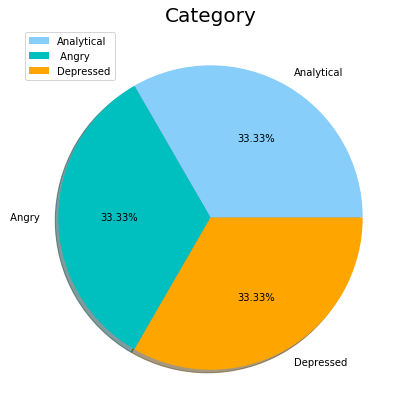

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 7)
visitor = df_upsampled
size = visitor['Category'].value_counts()
colors = ['lightskyblue', 'c', 'orange']
labels =  "Analytical", " Angry ", "Depressed"
explode = [0.0, 0.0, 0.0]
plt.subplot(1, 1, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Category', fontsize = 20)
plt.axis('off')
plt.legend()
plt.savefig('Category_with_balanced_dataset.png')

In [19]:
df_upsampled.shape

(4641, 2)

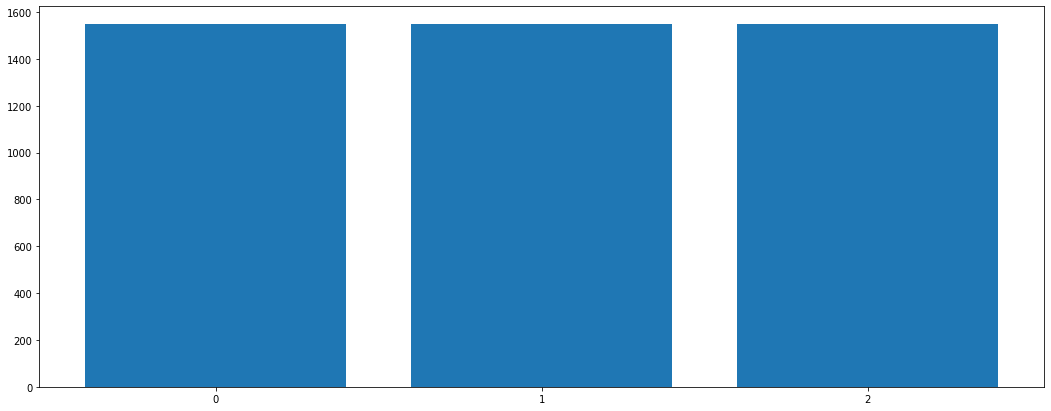

<Figure size 1296x504 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# import some data to play with
#df=pd.read_excel('Covid_19_dataset_with_preprocessing_3700_data.xlsx')
X = df_upsampled.iloc[:,:-1]
y = df_upsampled.iloc[:,-1]
class_names = y
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()
plt.savefig('balanced_dataset.png')

In [58]:
#df_upsampled.to_pickle('/content/drive/MyDrive/Dataset/dataset4_with_balancing2.pkl')

In [20]:
corpus = []
for index,value in df_upsampled.iterrows():
    text = str(value['opinion'])
    corpus.append(text)

In [21]:
corpus

['নিকা লোক নিজে সুরক্ষিত ভাব অসুরক্ষিত চলাফে সমস্যা দোষ',
 'এরে জুতা খাওয়ানো',
 'ওরে বাটপ দুনিয়া করোনা নাই',
 'মু\u200cখে আ\u200cসে ব\u200c টেস্ট বেশী ক্ষমতা হই\u200cলো না',
 'পৃথিবীর সবচ অশিক্ষিত মুর্খ বর্বর জাতী ইন্ডিয়ান রা',
 'কেই বলে সাধারন মানুষ মার না',
 'ব্রাজিল স্বাস্থ্য সেবা ভেঙ্গে পড় রিপোর্ট করছেনঅ অামা স্বাস্থ্য সেবা খুব শক্ত অবস্থানে অাছ নাযত হলুদ সাংবাদিকতা অাপনা করছ',
 'ভারত ভ্যাকসিন না পারেতাহলে ক্ষতিপূরণ সহ টাকা ফিরত',
 'সরকার কথায় পুলিশ শুধু খাট খাওয়া রিকশা ওয়ালা লকডাউন পিটুনি রিকশা ভাঙ অকথ্য ভাষায় গালাগা পুলিশ নৈতিক অবস্থান',
 'গবেষণ নামে ফান্ড হাতানোর নতুন কৌসলদু মাস গবেষণা বল বল বাংলাদেশের মরে ছাফতখন বল করোনা দুর্বল পড়েছেএর আগ রোগ বিস্তার খমতা নেইআসলে করোনা ভাইরাসে সংক্রামিত হব মত লোক বাচ না বাংলাদেশেএ কথ ফায়দা লুট কুলাঙ্গাররাযাহা পার নগদ কর পর চিন্তা পরেরাশিয়ার মত রাস্তায় বাঘ ছাড় বুঝানোর সময় নাই বাহিরে বের বাঘে খায় ফলবেতখন ঘরে সোজা উপায়',
 'স্বাস্থ্য খাত দুর্নীতির মহাসাগরে পতিত',
 'শিক্ষা মন্ত্রণালয় ব্যর্থতা এভাবে সরকার ব্যর্থতায় পর্যবসিত হয়',
 'পুলিশ আচরণ পুলি

#  TF-IDF(term frequency-inverse document frequency)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split())
X = cv.fit_transform(corpus).toarray()
y = df_upsampled.as_matrix(["Category"])

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [70]:
cv.get_feature_names()

['"',
 "'",
 '|',
 '||',
 '|||||',
 '|আমা',
 'অ',
 'অ_সুরক্ষিত',
 'অংক',
 'অংশ',
 'অংশগ্রহন',
 'অংশিদ',
 'অকারণে',
 'অকার্য্যকর',
 'অকাল',
 'অকৃতজ্ঞ',
 'অক্রিজ',
 'অক্সফোর্ড',
 'অক্সিজ',
 'অক্সিজেনের',
 'অগ্রগতি',
 'অগ্রাধিক',
 'অগ্রিম',
 'অচিরে',
 'অচেনা',
 'অজান্',
 'অজুহাত',
 'অঞ্চল',
 'অঞ্চলসহ',
 'অটো',
 'অটোরিকশায়',
 'অটোরিক্স',
 'অত',
 'অতএব',
 'অতন্ত্য',
 'অতি',
 'অতিক্রম',
 'অতিদ্রুত',
 'অতিরিক্ত',
 'অতিষ্ট',
 'অতিষ্ঠ',
 'অতিসত্বর',
 'অতীব',
 'অত্য',
 'অত্যন্ত',
 'অত্যাচারী',
 'অত্যান্ত',
 'অথচ',
 'অথচো',
 'অথবা',
 'অদক্ষ',
 'অদক্ষত',
 'অদক্ষতা',
 'অদূরদর্শীতা',
 'অদৃশ্য',
 'অধঃপতন',
 'অধিক',
 'অধিকাংশ',
 'অধিদপ্তর',
 'অধিবাসিকিন্তুু',
 'অন',
 'অনতিবিলম্বে',
 'অনন্য',
 'অনলাইন',
 'অনলাইনে',
 'অনাগ্রহী',
 'অনাদ',
 'অনাহারে',
 'অনিদিষ্ট',
 'অনিবার্য',
 'অনিয়ম',
 'অনিশ্চিত',
 'অনিশ্চয়তা',
 'অনীহা',
 'অনুচিত',
 'অনুদান',
 'অনুধাবন',
 'অনুপ্রবেশ',
 'অনুভব',
 'অনুমতি',
 'অনুমতির',
 'অনুমদন',
 'অনুমোদন',
 'অনুমোদনগরীব',
 'অনুমোধন',
 'অনুযায়ী',
 'অনুরাগী',
 'অনুরোধ',
 'অনুরোধ',
 'অন

# Cross Validation

In [47]:
#10 fold Cross validation score off LogisticRegression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
model=LogisticRegression()
kfold_validation=KFold(10)


import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[0.70752688 0.65086207 0.64224138 0.79741379 0.77586207 0.70905172
 0.79956897 0.74784483 0.71551724 0.73275862]
0.7278647571375603


In [48]:
#10 fold Cross validation score off SVM:

from sklearn import svm
from sklearn.model_selection import KFold
model=svm.SVC(kernel='rbf')
kfold_validation=KFold(10)


import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[0.77419355 0.75       0.71767241 0.84267241 0.85991379 0.78663793
 0.84051724 0.7887931  0.76293103 0.79956897]
0.7922900444938821


In [49]:
#10 fold Cross validation score off RandomForestClassifier:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
model=RandomForestClassifier(n_estimators=40)
kfold_validation=KFold(10)


import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

[0.7311828  0.71551724 0.67241379 0.8362069  0.78663793 0.74137931
 0.7887931  0.82112069 0.76293103 0.82758621]
0.7683769002595476


# **Train_ Test data split**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 342,stratify = y)

# ML Models Performance

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model = logreg_model.fit(x_train,y_train)
y_pred_logreg = logreg_model.predict(x_test)

from sklearn.metrics import classification_report
classification_report(y_test,y_pred_logreg)
print(classification_report(y_test,y_pred_logreg))
Accurcy =(accuracy_score(y_test,y_pred_logreg))
print(Accurcy)

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       310
           1       0.80      0.85      0.83       309
           2       0.85      0.83      0.84       310

    accuracy                           0.84       929
   macro avg       0.84      0.84      0.84       929
weighted avg       0.84      0.84      0.84       929

0.8428417653390743


# Confusion Matrix & ROC Curve Visualization of LogisticRegression

[[262  28  20]
 [ 22 263  24]
 [ 17  36 257]]
AxesSubplot(0.125,0.125;0.62x0.755)


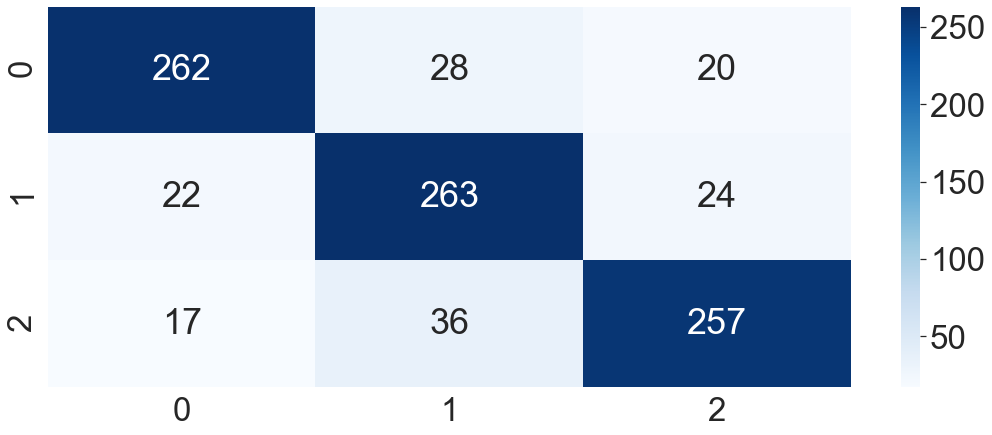

In [48]:
from sklearn.metrics import confusion_matrix
lg_matrix=confusion_matrix(y_test,y_pred_logreg)
print(lg_matrix)

import seaborn as sns
ax = plt.subplot()
sns.set(font_scale=3.0) #edited as suggested
print(sns.heatmap(lg_matrix, annot=True, ax=ax, cmap="Blues", fmt="g")) # annot=True to annotate cells

Confusion matrix, without normalization
[[262  28  20]
 [ 22 263  24]
 [ 17  36 257]]


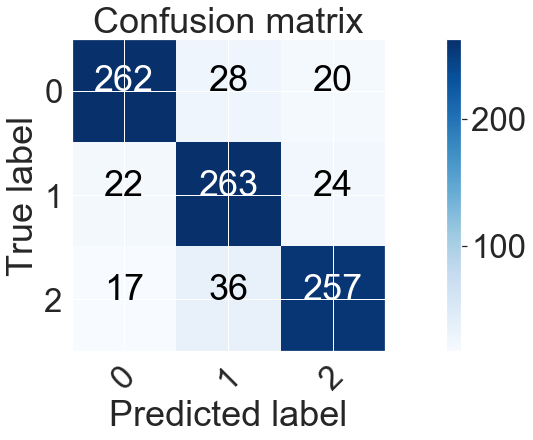

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_logreg)
#np.set_printoptions(precision=2)
#ax = plt.subplot()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix')


C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


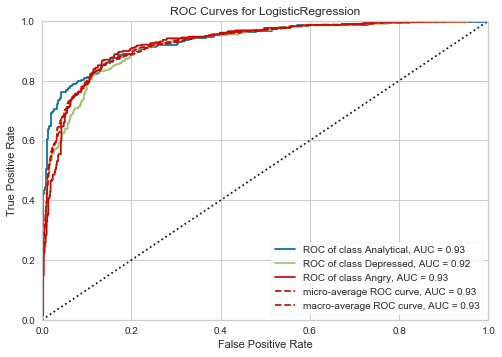

In [34]:
from sklearn.linear_model import LogisticRegression

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
logreg_model = LogisticRegression()
visualizer = ROCAUC(logreg_model, classes=["Analytical", "Depressed", "Angry"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 
#plt.savefig('ROC_Curve_LR_with_balance_data.png')

In [151]:
#from sklearn.naive_bayes import MultinomialNB
#mnb = MultinomialNB(alpha=0.001)
#mnb_model = mnb.fit(x_train,y_train)
#y_pred_mnb = mnb_model.predict(x_test)

#print(classification_report(y_test,y_pred_mnb))

# Svm with RBF  Kernel

In [25]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model = svm_model.fit(x_train,y_train)
y_pred_svm_r = svm_model.predict(x_test)

print(classification_report(y_test,y_pred_svm_r))
Accurcy =(accuracy_score(y_test,y_pred_svm_r))
print(Accurcy)

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       310
           1       0.88      0.89      0.88       309
           2       0.89      0.87      0.88       310

    accuracy                           0.89       929
   macro avg       0.89      0.89      0.89       929
weighted avg       0.89      0.89      0.89       929

0.8902045209903121


# Confusion Matrix & ROC Curve Visualization of Svm

[[283  14  13]
 [ 16 274  19]
 [ 17  23 270]]
AxesSubplot(0.125,0.125;0.62x0.755)


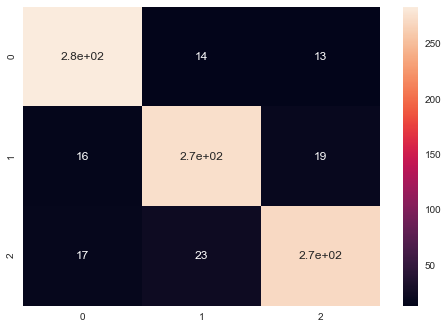

In [60]:
from sklearn.metrics import confusion_matrix
SVM_matrix=confusion_matrix(y_test,y_pred_svm_r)
print(SVM_matrix)

import seaborn as sns
print(sns.heatmap(SVM_matrix, annot=True))

Confusion matrix
[[283  14  13]
 [ 16 274  19]
 [ 17  23 270]]


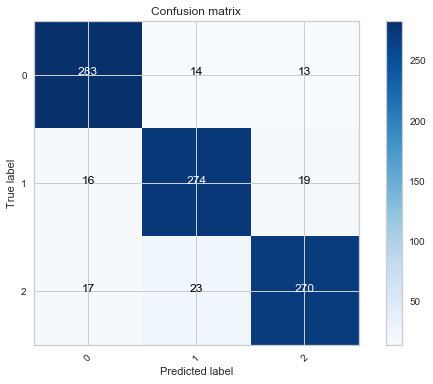

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_svm_r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix')

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


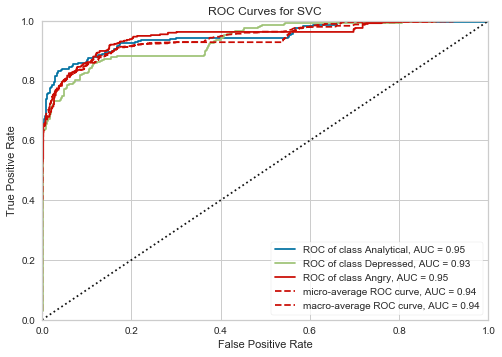

In [62]:
from sklearn import svm

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
svm_model = svm.SVC(kernel='rbf')
visualizer = ROCAUC(svm_model, classes=["Analytical", "Depressed", "Angry"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

# RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier()
RF_model = RF.fit(x_train,y_train)
y_pred_RF = RF_model.predict(x_test)

print(classification_report(y_test,y_pred_RF))
Accurcy =(accuracy_score(y_test,y_pred_RF))
print(Accurcy)

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.89      0.84      0.87       310
           1       0.84      0.86      0.85       309
           2       0.82      0.85      0.84       310

    accuracy                           0.85       929
   macro avg       0.85      0.85      0.85       929
weighted avg       0.85      0.85      0.85       929

0.8503767491926802


# Confusion Matrix & ROC Curve Visualization of RandomForestClassifier

[[260  22  28]
 [ 11 275  23]
 [ 17  28 265]]
AxesSubplot(0.125,0.125;0.62x0.755)


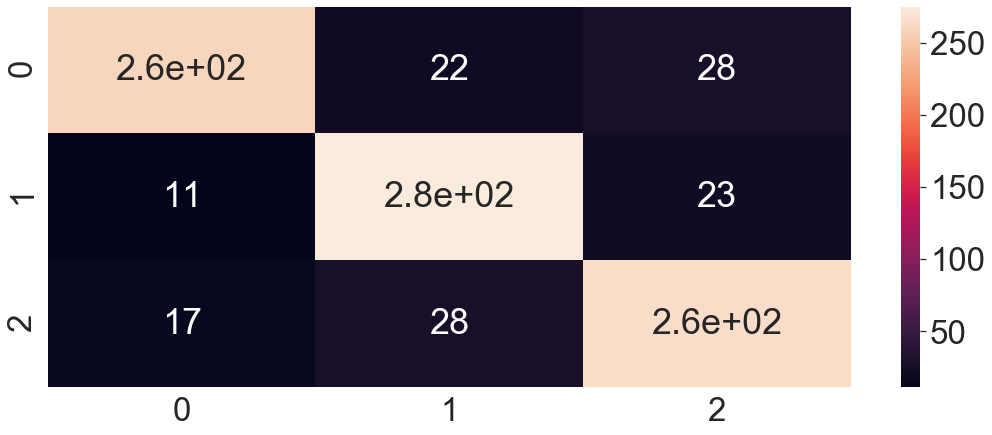

In [54]:
from sklearn.metrics import confusion_matrix
rbf_matrix=confusion_matrix(y_test,y_pred_RF)
print(rbf_matrix)

import seaborn as sns
print(sns.heatmap(rbf_matrix, annot=True))

Confusion matrix, without normalization
[[260  22  28]
 [ 11 275  23]
 [ 17  28 265]]


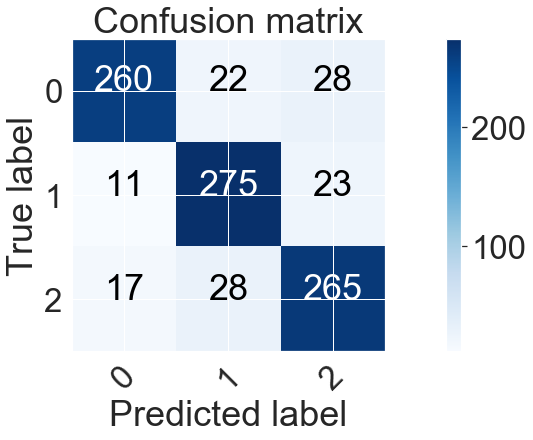

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_RF)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix')

C:\Users\Riyad\Anaconda3\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


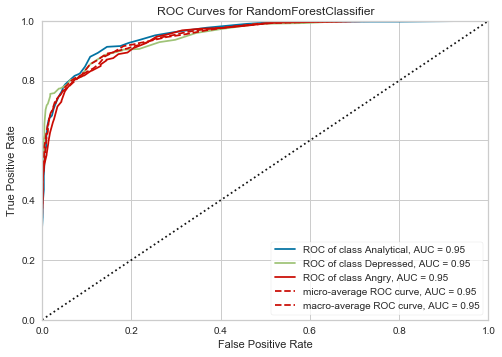

In [56]:
from sklearn.ensemble import RandomForestClassifier 

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
RF = RandomForestClassifier(n_estimators=40)
visualizer = ROCAUC(RF, classes=["Analytical", "Depressed", "Angry"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  